### 🔹 Шаг 1: Загрузка и первичный анализ данных

In [67]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
print(f"Количество строк: {df.shape[0]}. Количество столбцов: {df.shape[1]}")
df.head()

Количество строк: 7043. Количество столбцов: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [69]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 🔹 Шаг 2: Проверка данных на пропуски и типы данных

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [72]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
for column in df.columns:
    print(df[column].value_counts())
    print("------------------------------")

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
------------------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: c

In [74]:
# Так как у меня нету таргета я на основе имеющихся данных создам таргет
import numpy as np

conditions = [
    (df['MonthlyCharges'] > 100) & (df['InternetService'] == 'Fiber optic') & (df['Churn'] == 'No'),
    (df['MonthlyCharges'] <= 100) & (df['InternetService'] == 'DSL'),
    (df['MonthlyCharges'] < 50)
]

values = ['High', 'Medium', 'Low']

df['ideal_plan'] = np.select(conditions, values, default='Medium')

# Удаляю эти признаки так как они могут привести к утечку данных, но удалил customerId так как он является id
df.drop(columns=['customerID', 'MonthlyCharges', 'InternetService', 'Churn', 'TotalCharges'], inplace=True)

In [75]:
df['ideal_plan'].value_counts()

ideal_plan
Medium    4868
Low       1526
High       649
Name: count, dtype: int64

In [76]:
df.to_csv('data.csv', index=False)

In [77]:
df['ideal_plan'] = df['ideal_plan'].map({'Low': 0, 'Medium': 1, 'High': 2})

### 🔹 Шаг 3: Разделение данных на train и test

In [78]:
from sklearn.model_selection import train_test_split

X = df.drop('ideal_plan', axis=1)
y = df.ideal_plan

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(7043, 16)
(7043,)


In [79]:
y_train.describe()

count    5634.000000
mean        0.875044
std         0.538922
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: ideal_plan, dtype: float64

In [80]:
y_test.describe()

count    1409.000000
mean        0.877218
std         0.552473
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: ideal_plan, dtype: float64

### 🔹 Шаг 4: Масштабирование признаков

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = X.select_dtypes(include='number').columns

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

numeric_columns = pd.concat([X_train_scaled, X_test_scaled])

In [82]:
df.describe()

,SeniorCitizen,tenure,ideal_plan
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,0.875479
std,0.368612,24.559481,0.541621
min,0.000000,0.000000,0.000000
25%,0.000000,9.000000,1.000000
50%,0.000000,29.000000,1.000000
75%,0.000000,55.000000,1.000000
max,1.000000,72.000000,2.000000


In [83]:
numeric_columns.describe()

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.003641,-0.000080
std,1.003421,1.005614
min,-0.437749,-1.325551
25%,-0.437749,-0.957036
50%,-0.437749,-0.138115
75%,-0.437749,0.926483
max,2.284413,1.622566


### 🔹 Шаг 5: Кодирование категориальных признаков

In [84]:
import category_encoders as ce

categorical_features = X.select_dtypes(include='object').columns
cat_transformer_tme = ce.TargetEncoder(cols=categorical_features)

X_train_scaled[categorical_features] = cat_transformer_tme.fit_transform(X_train_scaled[categorical_features], y_train)
X_test_scaled[categorical_features] = cat_transformer_tme.transform(X_test_scaled[categorical_features])

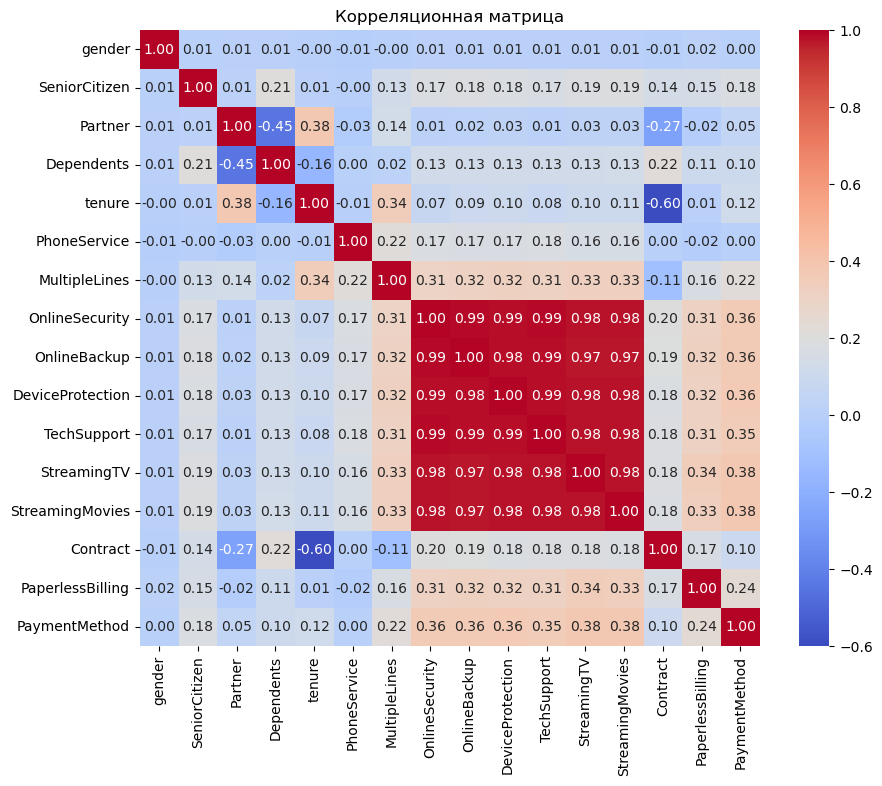

In [85]:
# Корреляционная матрица
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

In [86]:
# Из корреляциооной матрици видно что 6 признаки между собой очень сильно коррелируются из-за этого я удалил 5 из них
X_train_scaled = X_train_scaled.drop(columns=['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])
X_test_scaled = X_test_scaled.drop(columns=['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])

### 🔹 Шаг 6: Построение Baseline модели и оценка ее качество

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

baseline = KNeighborsClassifier(n_neighbors=3)
baseline.fit(X_train_scaled, y_train)

y_pred_baseline_train = baseline.predict(X_train_scaled)
y_pred_baseline_test = baseline.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, y_pred_baseline_train)
accuracy_test = accuracy_score(y_test, y_pred_baseline_test)

print(accuracy_train)
print(accuracy_test)

0.9353922612708555
0.8850248403122782


In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(baseline, X_train_scaled, y_train, cv=5)  

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.90150843 0.90150843 0.89707187 0.89352263 0.89253996]
Average cross-validation score: 0.8972302644125068


##### Я думал что accuracy на обучающих и тестовых данных показывает переобучение модели, а кросс валидация показала что модель хорошо обобщается на разных подвыборках данных

### 🔹 Шаг 7: Построение более сложных моделей

In [89]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=565, multi_class='ovr', penalty='elasticnet', solver='saga', l1_ratio=0.5)
log_reg.fit(X_train_scaled, y_train)
y_proba_lg_train = log_reg.predict_proba(X_train_scaled)
y_proba_lg_test = log_reg.predict_proba(X_test_scaled)

# DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)
d_tree.fit(X_train_scaled, y_train)
y_proba_dtree_train = d_tree.predict_proba(X_train_scaled)
y_proba_dtree_test = d_tree.predict_proba(X_test_scaled)

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
r_forest.fit(X_train_scaled, y_train)
y_proba_rf_train = r_forest.predict_proba(X_train_scaled)
y_proba_rf_test = r_forest.predict_proba(X_test_scaled)

# CatBoostClassifier
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.03, l2_leaf_reg=10, verbose=100)
catboost.fit(X_train_scaled, y_train)
y_proba_catboost_train = catboost.predict_proba(X_train_scaled)
y_proba_catboost_test = catboost.predict_proba(X_test_scaled)

0:	learn: 1.0533996	total: 5.71ms	remaining: 2.85s
100:	learn: 0.2491734	total: 473ms	remaining: 1.87s
200:	learn: 0.2099298	total: 959ms	remaining: 1.43s
300:	learn: 0.1993292	total: 1.52s	remaining: 1.01s
400:	learn: 0.1925047	total: 2.03s	remaining: 502ms
499:	learn: 0.1870752	total: 2.59s	remaining: 0us


In [90]:
from sklearn.metrics import roc_auc_score

auc_lg_train = roc_auc_score(y_train, y_proba_lg_train, multi_class='ovr', average='macro')
auc_lg_test = roc_auc_score(y_test, y_proba_lg_test, multi_class='ovr', average='macro')

auc_dtree_train = roc_auc_score(y_train, y_proba_dtree_train, multi_class='ovr', average='macro')
auc_dtree_test = roc_auc_score(y_test, y_proba_dtree_test, multi_class='ovr', average='macro')

auc_rf_train = roc_auc_score(y_train, y_proba_rf_train, multi_class='ovr', average='macro')
auc_rf_test = roc_auc_score(y_test, y_proba_rf_test, multi_class='ovr', average='macro')

auc_catboost_train = roc_auc_score(y_train, y_proba_catboost_train, multi_class='ovr', average='macro')
auc_catboost_test = roc_auc_score(y_test, y_proba_catboost_test, multi_class='ovr', average='macro')

df_quality = pd.DataFrame({
    "Models" : ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'CatBoostClassifier'],
    'Train Data' : [auc_lg_train, auc_dtree_train, auc_rf_train, auc_catboost_train], 
    'Test Data' : [auc_lg_test, auc_dtree_test, auc_rf_test, auc_catboost_test]
})

df_quality

,Models,Train Data,Test Data
0,LogisticRegression,0.946358,0.947868
1,DecisionTreeClassifier,0.933079,0.930627
2,RandomForestClassifier,0.971497,0.948735
3,CatBoostClassifier,0.963894,0.948981


### 🔹 Шаг 8: Работа с лучшим моделем

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

param_grid = {
    'n_estimators': [50 , 80],
    'max_depth': [3, 5], 
    'min_samples_split': [5, 10], 
    'min_samples_leaf': [3, 5],   
}

grid_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1, max_samples=0.7),
    param_distributions=param_grid, 
    n_iter=15, cv=5, scoring='roc_auc', 
    n_jobs=-1, verbose=1, random_state=42
)

grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

best_rf = RandomForestClassifier(
    **best_params, 
    random_state=42, 
    n_jobs=-1,
    class_weight='balanced'
)

best_rf.fit(X_train_scaled, y_train)

y_pred_train = best_rf.predict(X_train_scaled)
y_pred_test = best_rf.predict(X_test_scaled)

y_pred_proba_train = best_rf.predict_proba(X_train_scaled)
y_pred_proba_test = best_rf.predict_proba(X_test_scaled)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Лучшие параметры: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 3}


### 🔹 Шаг 9: Результат лучшего моделья

In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train, average="weighted", multi_class='ovr')
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test, average="weighted", multi_class='ovr')

precision_test = precision_score(y_test, y_pred_test, average="weighted")
recall_test = recall_score(y_test, y_pred_test, average="weighted")
f1_test = f1_score(y_test, y_pred_test, average="weighted")

precision_train = precision_score(y_train, y_pred_train, average="weighted")
recall_train = recall_score(y_train, y_pred_train, average="weighted")
f1_train = f1_score(y_train, y_pred_train, average="weighted")

import pandas as pd

metrics_df = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Accuracy": [accuracy_train, accuracy_test],
    "Precision": [precision_train, precision_test],
    "Recall": [recall_train, recall_test],
    "F1-score": [f1_train, f1_test],
    "ROC AUC": [roc_auc_train, roc_auc_test]
})

metrics_df

,Dataset,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Train,0.782925,0.918334,0.782925,0.821421,0.960203
1,Test,0.801987,0.911521,0.801987,0.833500,0.960180


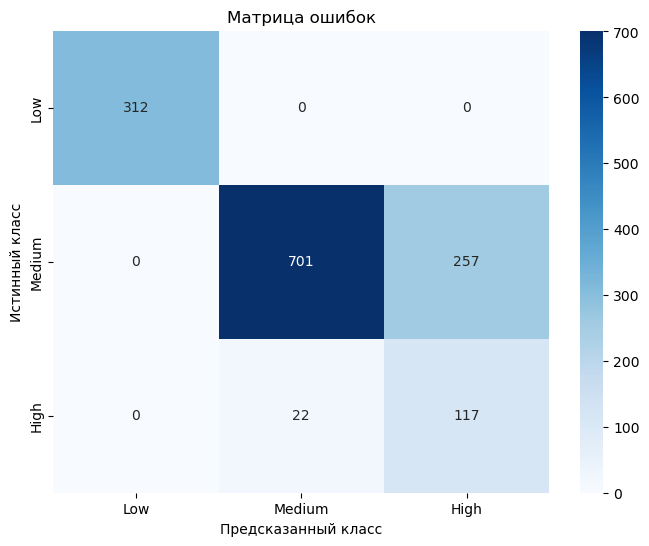

In [110]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

##### Модель предсказывает 257 класса 'Medium' как класс 'High', думаю что это из-за дисбаланса классов. Я применил Oversampling, но он не так сильно влиял на результат, даже влиял хуже из-за этого я его убрал

### 🔹 Шаг 10: Анализ важности признаков

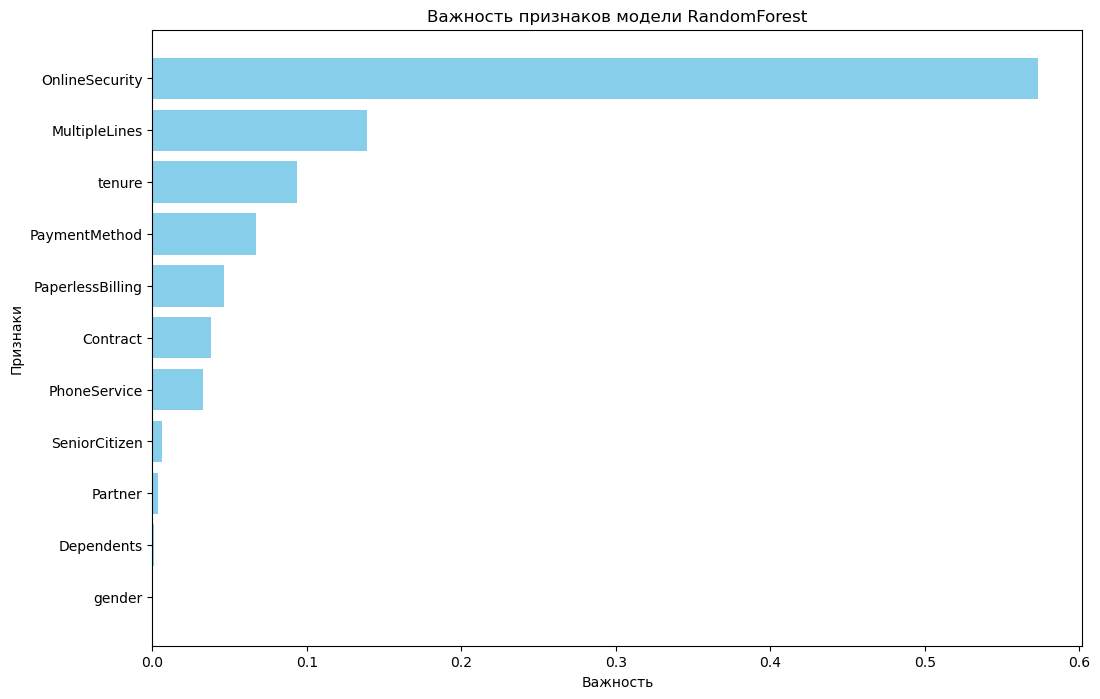

In [112]:
import matplotlib.pyplot as plt

importances_rf = best_rf.feature_importances_

feature_names = X_train_scaled.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.title('Важность признаков модели RandomForest')
plt.show()

In [120]:
# Я удалил признак 'OnlineSecurity' думая что это утечка данных, но качество модели сильно ухудшилось. По моему это означает что
# этот признак на самом деле имеет важность для модели, а не утечка данных. Из-за этого и я поставил этот признак